In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from capsa import ControllerWrapper, MVEWrapper, HistogramWrapper, HistogramCallback
from capsa.utils import get_user_model, plot_loss, get_preds_names, plot_risk_2d




In [5]:
def get_data_v2(batch_size=256, is_show=True):
    x = np.random.uniform(-4, 4, (16384, 1)) 
    x_val = np.linspace(-6, 6, 2048).reshape(-1, 1)

    y = x ** 3 / 10
    y_val = x_val ** 3 / 10

    # add noise to y
    y += np.random.normal(0, 0.2, (16384, 1))
    y_val += np.random.normal(0, 0.2, (2048, 1))

    # add greater noise in the middle to reproduce that plot from the 'Deep Evidential Regression' paper
    x = np.concatenate((x, np.random.normal(1.5, 0.3, 4096)[:, np.newaxis]), 0)
    y = np.concatenate((y, np.random.normal(1.5, 0.6, 4096)[:, np.newaxis]), 0)

    x_val = np.concatenate((x_val, np.random.normal(1.5, 0.3, 256)[:, np.newaxis]), 0)
    y_val = np.concatenate((y_val, np.random.normal(1.5, 0.6, 256)[:, np.newaxis]), 0)

    if is_show:
        plt.scatter(x, y, s=.5, c='#463c3c', zorder=2, label='train data')
        plt.scatter(x_val, y_val, s=.5, label='test data')
        plt_vspan()
        plt.legend()
        plt.show()

    def _get_ds(x, y, shuffle=True):
        ds = tf.data.Dataset.from_tensor_slices(
            (x.astype(np.float32), y.astype(np.float32))
        )
        ds = ds.cache()
        if shuffle:
            ds = ds.shuffle(x.shape[0])
        ds = ds.batch(batch_size)
        ds = ds.prefetch(tf.data.AUTOTUNE)

        return ds

    ds_train = _get_ds(x, y)
    ds_val = _get_ds(x_val, y_val, False)

    # return x, y, x_val, y_val as well to test models on both batched and not batched inputs
    return ds_train, ds_val, x, y, x_val, y_val

In [6]:
_, _, x, y, x_val, y_val = get_data_v2(batch_size=256, is_show=False)

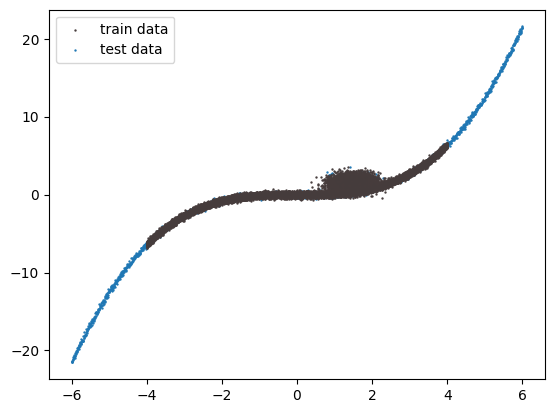

In [8]:
plt.scatter(x, y, s=.5, c='#463c3c', zorder=2, label='train data')
plt.scatter(x_val, y_val, s=.5, label='test data')
plt.legend()
plt.show()